# Question 4

* Intensity transformation that should be applied is f (x) = min(x + (a/128) * e(−(x−128)*2)/2σ**2) , 255).
* It should be applied only to the saturation plane.

In [1]:
#Importing the necessary libraries 

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Part (a)

In [2]:
# Load the image
image = cv.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/spider.png', cv.IMREAD_COLOR)

# Convert the image to the HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
hue_plane = hsv_image[:,:,0]
saturation_plane = hsv_image[:,:,1]
value_plane = hsv_image[:,:,2]

#Displaying the Planes for Reference
print('Hue plane is : ',hue_plane)
print('Saturation plane is : ',saturation_plane)
print('Value plane is : ',value_plane)


Hue plane is :  [[100 101 101 ... 100 101 101]
 [101 101 101 ...  99  98 102]
 [101 101 101 ... 103 103 103]
 ...
 [114 113 109 ... 106 106 105]
 [107 107 110 ... 106 106 106]
 [108 114 105 ... 106 106 106]]
Saturation plane is :  [[29 26 28 ... 31 36 41]
 [33 33 33 ... 31 27 32]
 [33 33 33 ... 40 35 28]
 ...
 [18 15 29 ... 51 51 55]
 [34 35 24 ... 54 55 54]
 [40 21 42 ... 56 56 56]]
Value plane is :  [[205 203 204 ... 122 120 118]
 [211 211 211 ... 108 104 104]
 [211 211 211 ...  90  87  83]
 ...
 [ 69  68  71 ...  55  55  56]
 [ 67  66  65 ...  52  51  52]
 [ 64  60  61 ...  50  50  50]]


## Part(b)

In [7]:
# Intensity transformation function
def intensity_transformation(x, a, sigma):
    return np.minimum(x + (a / 128) * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255)

# Parameters
a = 0.5
sigma = 70

# Apply the intensity transformation to the saturation plane
enhanced_saturation_plane = intensity_transformation(saturation_plane, a, sigma).astype(np.uint8)

# Displaying the enhanced saturation plane
print('Enhanced Saturation Plane is : ',enhanced_saturation_plane)


Enhanced Saturation Plane is :  [[29 26 28 ... 31 36 41]
 [33 33 33 ... 31 27 32]
 [33 33 33 ... 40 35 28]
 ...
 [18 15 29 ... 51 51 55]
 [34 35 24 ... 54 55 54]
 [40 21 42 ... 56 56 56]]


## Part(c)

In [8]:
# Create the enhanced HSV image
enhanced_hsv_image = np.stack([hue_plane, enhanced_saturation_plane, value_plane], axis=-1)

# Convert the enhanced HSV image back to the BGR color space
enhanced_bgr_image = cv.cvtColor(enhanced_hsv_image, cv.COLOR_HSV2BGR)


## Part(d)

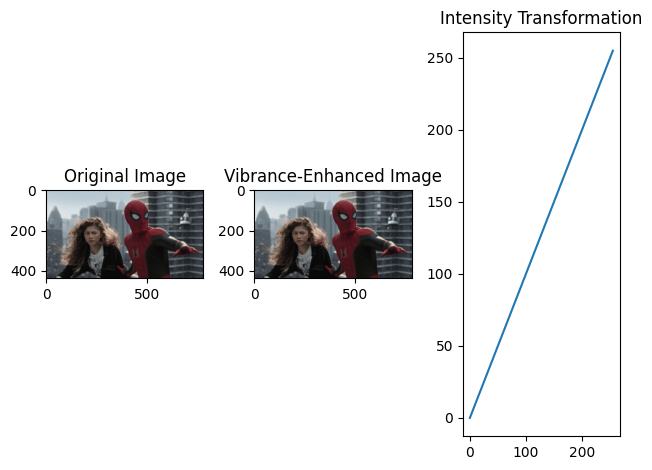

In [10]:
# Display the images

plt.subplot(1, 3, 1)

# Converting to RGB space for displaying
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(enhanced_bgr_image, cv.COLOR_BGR2RGB))
plt.title("Vibrance-Enhanced Image")

plt.subplot(1, 3, 3)
x_vals = np.arange(0, 256)
intensity_vals = intensity_transformation(x_vals, a, sigma)
plt.plot(x_vals, intensity_vals)
plt.title("Intensity Transformation")

plt.tight_layout()
plt.show()

#Displaying using OpenCV
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',image)
cv.waitKey(0)

cv.imshow('Enhanced', enhanced_bgr_image)
cv.waitKey(0)
cv.destroyAllWindows()
